First, we import the necessary libraries

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from messy import *

We generate samples of a bi-modal distribution as the target density that we would like to infer it from its samples.

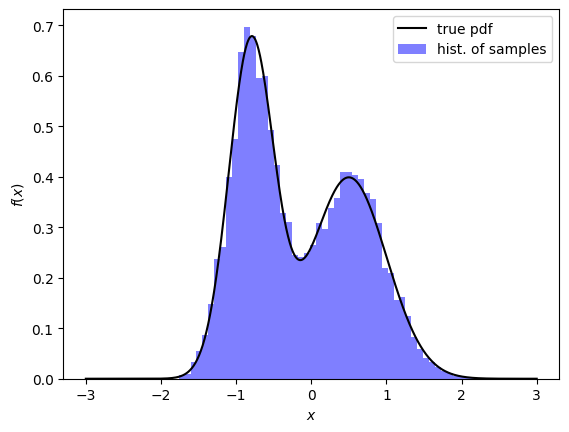

In [2]:
def Gaussian(x,mu,sig):
  return 1.0/(sig*np.sqrt(2.0*np.pi)) * np.exp(-0.5*(x-mu)**2/sig**2)

def bi_mod(x,mu1,mu2,sig1,sig2):
  return 0.5*( Gaussian(x,mu1,sig1) + Gaussian(x,mu2,sig2) )

n_samples = 10000
mu1 = -0.8; mu2=0.5; sig1=0.3; sig2 = 0.5
X = np.concatenate([np.random.normal(mu1,sig1,int(n_samples/2)), np.random.normal(mu2,sig2,n_samples-int(n_samples/2))])
true_pdf = lambda x: bi_mod(x,mu1,mu2,sig1,sig2)

xx = np.linspace(-3, 3, 1000) # for plotting
fig, ax = plt.subplots()
ax.plot(xx, true_pdf(xx), color="black", label = "true pdf")
_ = ax.hist(X, color="blue", label = "hist. of samples", density=True, bins=50, alpha=0.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.legend()
plt.show()

In [3]:
highest_order = 4
x = sp.symbols('x', real=True)
pow = [sp.lambdify(x, x**i, "numpy") for i in range(1, highest_order+1)] # Poly. basis functions

binary_operators = [sp.Mul]
unary_functions = [sp.cos, sp.sin] + pow

messy = MESSY(n_levels=1, nm_xe=2, highest_order=highest_order, nb_l=2, nb_u=4, poly_order=4, tree_depth=2, binary_operators=binary_operators, unary_functions=unary_functions)

dic, best_iter = messy.get_pdf(X, N_iters=10)


 Round: 1  out of  10 

Level: 0
generate a basis
cond(L) 1.0000000000000069  after orthogonalization
found a good basis
exp(-0.633122530726229*x**4 + 0.388383616471003*x**3 + 0.614097122315833*x**2 - 0.822466972430873*x)
SDE done, Starting MxED
MxED done

 Round: 2  out of  10 

Level: 0
cond(L) 2980.6318584937503
cond(L) 79.10655224630553
cond(L) 10.358933553972445
cond(L) 19.679401417447274
cond(L) 554.2028369333219
cond(L) 3.184623508435112
generate a basis
cond(L) 1.0000000000000007  after orthogonalization
found a good basis
exp(-0.87092062941723*x**2 + 0.11479241152237*sin(x**2)**4)
SDE done, Starting MxED
MxED done

 Round: 3  out of  10 

Level: 0
cond(L) 835.175624131066
cond(L) 1383690.6745282141
cond(L) 19.731428173203334
cond(L) 33.92169123613236
cond(L) 4.379339014771376
generate a basis
cond(L) 1.000000000000004  after orthogonalization
found a good basis
exp(-0.00184989418802782*x**5*cos(x) - 0.822040852169146*x**2)
SDE done, Starting MxED
MxED done

 Round: 4  out of 

Found MESSY-P:
0.341049274789943*exp(-0.633122530726229*x**4 + 0.388383616471003*x**3 + 0.614097122315833*x**2 - 0.822466972430873*x)



Found MESSY-S:
0.341049274789943*exp(-0.633122530726229*x**4 + 0.388383616471003*x**3 + 0.614097122315833*x**2 - 0.822466972430873*x)





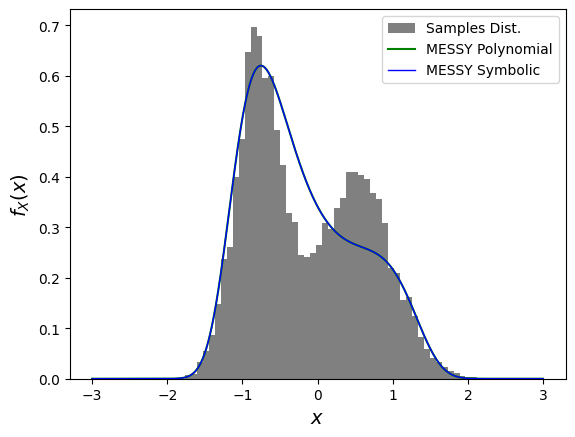

In [4]:
xx = np.linspace(-3, 3, 1000)

print("Found MESSY-P:")
print( dic[0][1] )
print("\n\n")

print("Found MESSY-S:")
print( dic[best_iter][1] )
print("\n\n")

fig, ax = plt.subplots()
plt.rcParams['mathtext.fontset'] = 'cm'
plt.hist(X, bins=50, density=True, color="grey", label = "Samples Dist.")
plt.plot(xx, dic[0][0](xx), linewidth = 1.5, label = "MESSY Polynomial", color = 'green')
plt.plot(xx, dic[best_iter][0](xx), linewidth = 1, label = "MESSY Symbolic", color = 'blue')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f_X(x)$", fontsize=14)
plt.legend()

plt.show()

In [11]:
best_iter

0